<a href="https://colab.research.google.com/github/Nayoung-young/lec-ecommerce-clone/blob/main/ch03_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#_01. 분석 목적 
- 광고 반응률 예측 

- logsitic regression: 이진분류를 예측 
- y : 광고 클릭 여부, x : 고객에 대한 정보 

#_02. 모듈, 데이터 로딩 및 데이터 확인 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
data = pd.read_csv('advertising.csv')

In [6]:
data.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0
5,59.99,23.0,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,5/19/2016 14:30,0
6,88.91,NaN,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,1/28/2016 20:59,0
7,66.00,48.0,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,3/7/2016 1:40,1
8,74.53,30.0,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,4/18/2016 9:33,0
9,69.88,20.0,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,7/11/2016 1:42,0


#_03. 결측치 확인 및 처리 

In [7]:
data.info() # Age에 결측치 존재 
# Area Income: 개인에 대한 정확한 income 아님, 지역의 평균 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [8]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


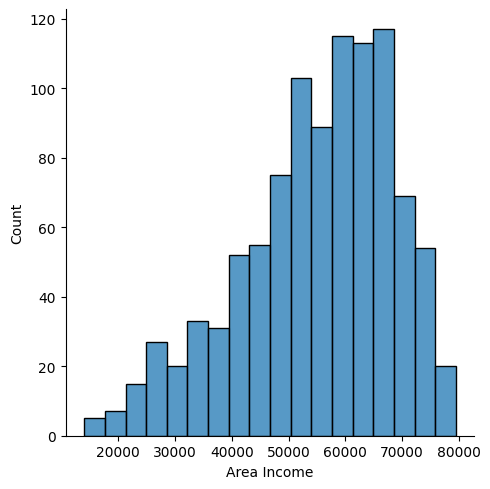

In [11]:
sns.displot(data['Area Income'])

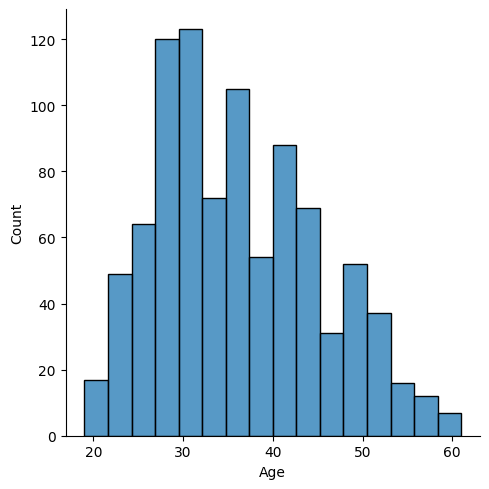

In [12]:
sns.displot(data['Age']) # 이 정도는 처리 안해줘도 ok 

In [13]:
data['Country'].nunique()

237

In [15]:
data['City'].nunique()

969

In [16]:
data['Ad Topic Line'].nunique() # 각 Ad line이 모두 다름 
# 지금 단계에서 이것은 활용 X 

1000

In [19]:
data.isna().sum() / len(data) # 모델링 전 결측치 처리해야 함 

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [20]:
data_01 = data.dropna() # 행 자체를 날려버림. 결측치 너무 많을 경우 문제 됨 

In [21]:
data_02 = data.drop('Age', axis = 1) # Age가 중요한 변수일 수도 있으므로 주의 

- 보통 mean, median로 fill
- mean을 가장 추천  

In [25]:
data_mean = data.fillna(round(data['Age'].mean())) 
data['Age'].mean()

36.12882096069869

In [27]:
data_med = data.fillna(round(data['Age'].median())) 
data['Age'].median()

35.0

In [28]:
data = data_mean.copy()

많은 missing value가 있을 경우에는, **column 자체를 drop 하는 게 나음**
- 때에 따라, 결측치 자체가 의미가 있는 경우도 있음
  - ex) 은행에서 정보가 너무 없는 고객 추려내기 
  - 텍스트 컬럼으로 바꿔버리기 (카테고리화) 

#_04. Train, Test set 나누기 

In [29]:
from sklearn.model_selection import train_test_split 

In [34]:
cols = data.columns.tolist()
cols

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Ad Topic Line',
 'City',
 'Male',
 'Country',
 'Timestamp',
 'Clicked on Ad']

In [36]:
X = data[['Daily Time Spent on Site','Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
# 데이터가 충분히 많다면 6:4도 ok 
# train이 충분히 많아야 함 

In [37]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
420,34.30,41.0,53167.68,160.74,1
278,81.37,26.0,53049.44,156.48,1
218,34.87,40.0,59621.02,200.23,0
363,73.30,36.0,68211.35,135.72,1
850,78.58,33.0,51772.58,250.11,1
...,...,...,...,...,...
855,50.87,24.0,62939.50,190.41,0
871,76.79,27.0,55677.12,235.94,0
835,63.11,34.0,63107.88,254.94,1
792,56.56,26.0,68783.45,204.47,1


In [40]:
y_train

420    1
278    0
218    1
363    1
850    0
      ..
855    1
871    0
835    0
792    0
520    1
Name: Clicked on Ad, Length: 700, dtype: int64

#_05. Logistic Regression Modeling 

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()

In [44]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model.coef_

array([[-7.26288827e-02,  2.64848384e-01, -1.06769544e-05,
        -2.26804107e-02,  2.44029728e-03]])

In [53]:
pred = model.predict(X_test)

In [48]:
y_test

249    1
353    0
537    0
424    1
564    1
      ..
193    1
838    1
974    1
203    0
425    1
Name: Clicked on Ad, Length: 300, dtype: int64

#_06. Evaluation 

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [54]:
accuracy_score(y_test, pred)

0.8966666666666666

In [55]:
confusion_matrix(y_test, pred)

array([[137,   8],
       [ 23, 132]])

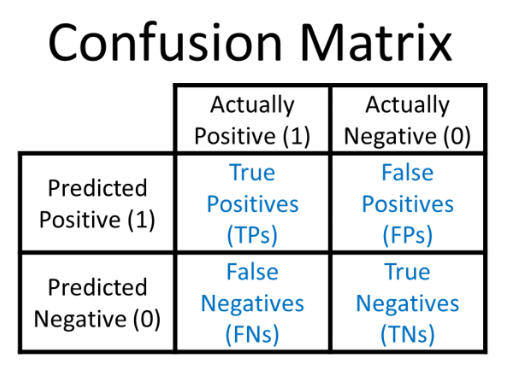